In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Dataframes import contratos_df

In [ ]:
grafico_contratos_df = contratos_df[contratos_df['ESTADO'] == 'Terminado']
grafico_contratos_df['ATRASO'] = (grafico_contratos_df['FECHATERMINO'] - grafico_contratos_df['FECHATERMINOORIGINAL']).dt.days
grafico_contratos_df['ATRASO'] = grafico_contratos_df['ATRASO'].map(lambda x: 'Atrasado' if x > 31 else 'Adelantado/A tiempo').astype('category')

Text(0.5, 0, 'Categoria del proyecto')

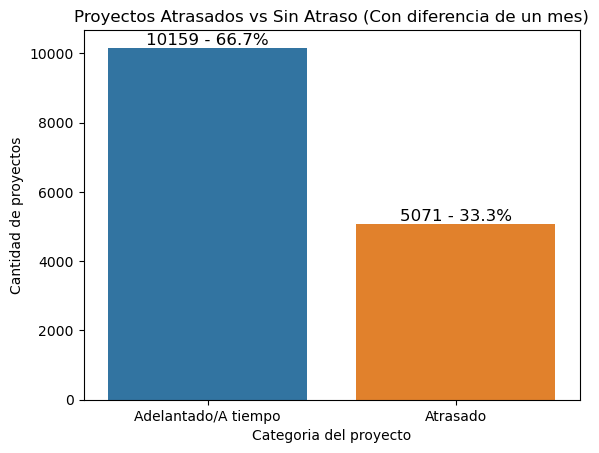

In [ ]:
grafico = sns.countplot(grafico_contratos_df, x='ATRASO', hue='ATRASO', stat='count')
for p in grafico.patches:
    height = p.get_height()
    grafico.text(
        p.get_x() + p.get_width() / 2,
        height + 0.1,
        str(int(height)) + f' - {round(height*100/len(grafico_contratos_df), 2)}%', 
        ha='center', 
        va='bottom',
        fontsize=12  
    )    
plt.title('Proyectos Atrasados vs Sin Atraso (Con diferencia de un mes)')
plt.ylabel('Cantidad de proyectos')
plt.xlabel('Categoria del proyecto')

Grafico de obra que tarda mas en realizarse

In [48]:
grafico_contratos_df = contratos_df[contratos_df['ESTADO'] == 'Terminado']
grafico_contratos_df['DURACION'] = (grafico_contratos_df['FECHATERMINO'] - grafico_contratos_df['FECHAINICIO']).dt.days

In [60]:
grafico_contratos_df = grafico_contratos_df[grafico_contratos_df['DURACION'] >= 0]
gb = grafico_contratos_df.groupby('SERVICIO').mean(numeric_only=True)[['DURACION']]

C:\Users\IMC\AppData\Local\Temp\ipykernel_14700\4242081909.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb = grafico_contratos_df.groupby('SERVICIO').mean(numeric_only=True)[['DURACION']]


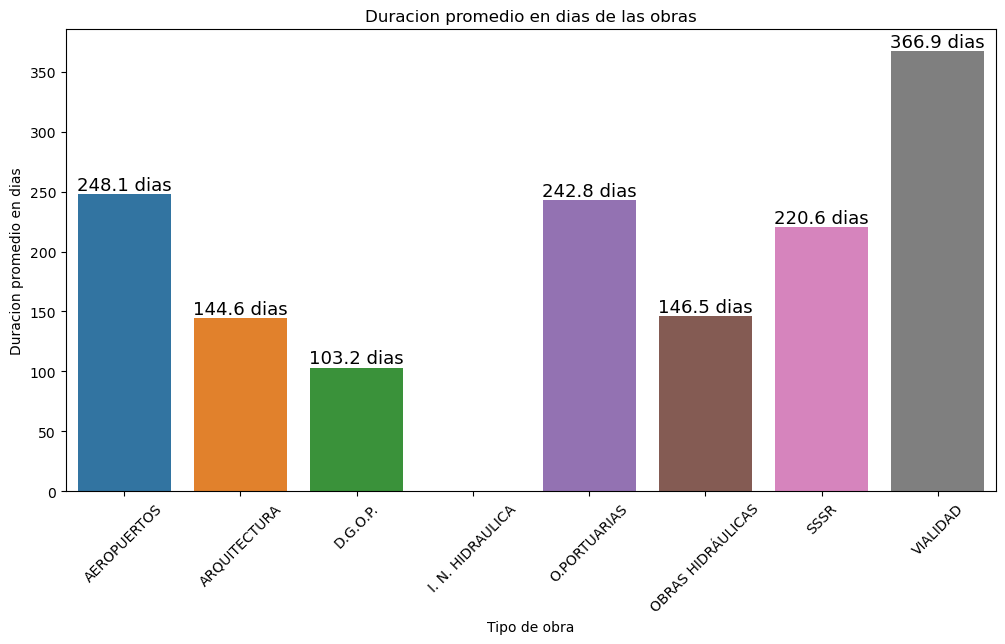

In [ ]:
plt.figure(figsize=(12, 6))
grafico = sns.barplot(data=gb, x='SERVICIO', y='DURACION', hue='SERVICIO')
plt.xticks(rotation=45)
plt.xlabel('Tipo de obra')
plt.ylabel('Duracion promedio en dias')
plt.title('Duracion promedio en dias de las obras')
for p in grafico.patches:
    height = p.get_height()
    grafico.text(
        p.get_x() + p.get_width() / 2,
        height + 0.1,
        str(round(height, 1))+ ' dias', 
        ha='center', 
        va='bottom',
        fontsize=13
    )   